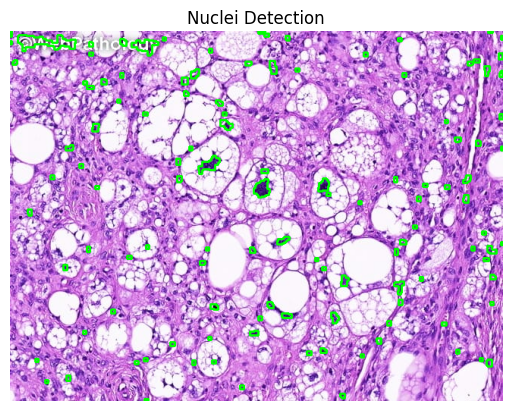

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the H&E stained image
hematoxylin_and_eosin_img = cv2.imread(r"/content/WhatsApp Image 2024-04-17 at 1.21.36 AM.jpeg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(hematoxylin_and_eosin_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)  # You can adjust the kernel size (here it's 5x5) as needed

# Separate the hematoxylin (blue) channel
hematoxylin_channel = hematoxylin_and_eosin_img[:, :, 0]

# Thresholding to segment nuclei
_, nucleus_mask = cv2.threshold(hematoxylin_channel, 150, 200, cv2.THRESH_BINARY_INV)

# Perform morphological operations to clean up the nucleus mask
kernel = np.ones((5, 5), np.uint8)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_CLOSE, kernel)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_OPEN, kernel)

# Find contours of nuclei
contours, _ = cv2.findContours(nucleus_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nuclei_img = hematoxylin_and_eosin_img.copy()
cv2.drawContours(nuclei_img, contours, -1, (0, 255, 0), 2)

# Convert BGR image to RGB for matplotlib display
nuclei_img_rgb = cv2.cvtColor(nuclei_img, cv2.COLOR_BGR2RGB)

# Display the image with nuclei contours
plt.imshow(nuclei_img_rgb)
plt.title('Nuclei Detection')
plt.axis('off')
plt.show()



In [ ]:
import cv2
import numpy as np

# Load the H&E stained image
hematoxylin_and_eosin_img = cv2.imread(r"/home/snucse/Desktop/SET-1/image.png")

# Convert the image to grayscale
gray_img = cv2.cvtColor(hematoxylin_and_eosin_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)  # You can adjust the kernel size (here it's 5x5) as needed

# Separate the hematoxylin (blue) channel
hematoxylin_channel = hematoxylin_and_eosin_img[:, :, 0]

# Thresholding to segment nuclei
_, nucleus_mask = cv2.threshold(hematoxylin_channel, 100, 200, cv2.THRESH_BINARY_INV)

# Perform morphological operations to clean up the nucleus mask
kernel = np.ones((5, 5), np.uint8)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_CLOSE, kernel)
nucleus_mask = cv2.morphologyEx(nucleus_mask, cv2.MORPH_OPEN, kernel)

# Find contours of nuclei
contours, _ = cv2.findContours(nucleus_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nuclei_img = hematoxylin_and_eosin_img.copy()
cv2.drawContours(nuclei_img, contours, -1, (0, 255, 0), 2)

# Display the image with nuclei contours
cv2.imshow('Nuclei Detection', nuclei_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

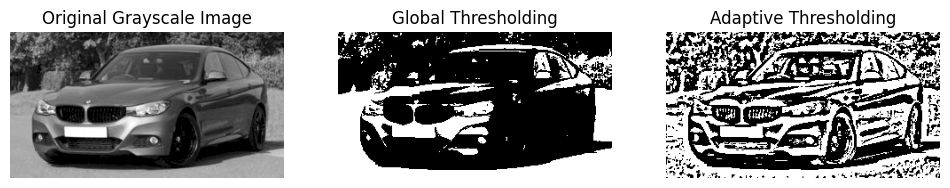

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image
gray_img = cv2.imread("/content/Screenshot 2024-04-17 015633.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
_, global_thresh_img = cv2.threshold(gray_img, 120, 170, cv2.THRESH_BINARY)

# Perform adaptive thresholding
adaptive_thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 2)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_thresh_img, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh_img, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.show()


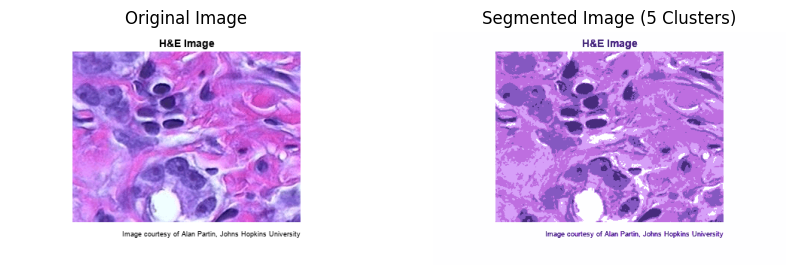

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/p.png')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)

# Define the criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Define the number of clusters
num_clusters = 5  # You can adjust this number to see how it affects segmentation

# Perform K-means clustering
_, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)

# Segment the original image based on the clustered centers
segmented_image = centers[labels.flatten()]

# Reshape the segmented image back to the original shape
segmented_image = segmented_image.reshape(image_rgb.shape)

# Display the original image and the segmented image
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot the segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image ({} Clusters)'.format(num_clusters))
plt.axis('off')

plt.show()


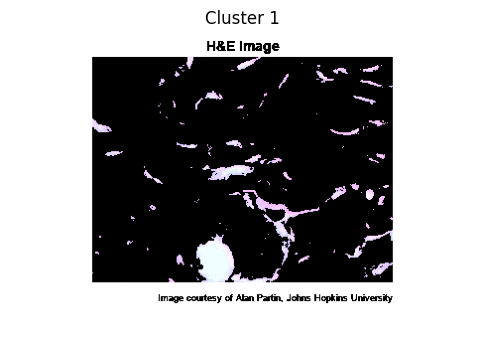

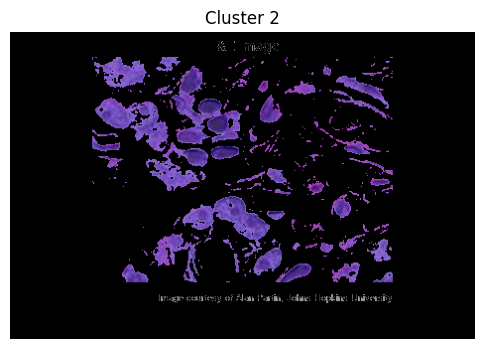

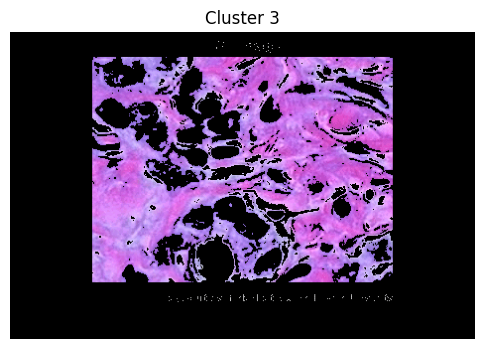

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/p.png')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)

# Define the criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Define the number of clusters
num_clusters = 3

# Perform K-means clustering
_, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Display each cluster separately
for i in range(num_clusters):
    # Create a mask for pixels belonging to the current cluster
    mask = labels.flatten() == i

    # Reshape the mask to match the dimensions of the image_rgb array
    mask = mask.reshape(image_rgb.shape[0], image_rgb.shape[1])

    # Create an image with pixels of the current cluster
    cluster_image = np.zeros_like(image_rgb)
    cluster_image[mask] = image_rgb[mask]

    # Display the image of the current cluster
    plt.figure(figsize=(6, 6))
    plt.imshow(cluster_image)
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
    plt.show()


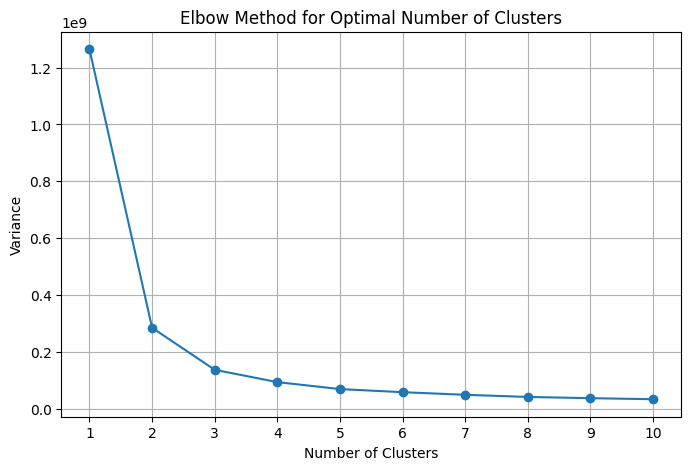

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/p.png')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)

# Define the criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Define the range of clusters to try
min_clusters = 1
max_clusters = 10
num_clusters_range = range(min_clusters, max_clusters + 1)

# Initialize a list to store the variance for each number of clusters
variance = []

# Perform K-means clustering for each number of clusters in the range
for num_clusters in num_clusters_range:
    _, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    variance.append(np.sum(np.square(pixel_values - centers[labels.flatten()])))

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, variance, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()


In [ ]:
# Save masks
cv2.imwrite('crack_mask.jpg', crack_mask)
cv2.imwrite('high_intensity_crack_mask.jpg', high_intensity_crack_mask)
cv2.imwrite('low_intensity_crack_mask.jpg', low_intensity_crack_mask)